# Data manipulation and collection

## Python has dynamic typing
What sets dynamic programming languages like Python apart from **strongly-typed** programming languages like Java is that we can change the type of a variable at execution time. In strongly-typed programming languages we define the type ahead of time and enforce it at runtime. In Python we can do things like this:

In [ ]:
a = 3 # a is an integer
print("a is", a, "and is of type", type(a))
a = a/3
print("a is", a, "and is of type", type(a))

There has been a move lately to make typing more explicit in Python as a way to make the intention of the code more clear, improve performance and catch errors. The Python fork [mypy](https://github.com/python/mypy) requires types to be explicit and correct or produces an error, and the data validation library [Pydantic](https://docs.pydantic.dev/latest/) allows the creation of custom data classes with precisely type parameters. In standard Python, type hints tell the person viewing the code what type to expect and allows IDE (Integrated Development Environment) like JupyterLab or VSCode what methods to suggest for that variable.

In [2]:
# example function without type hints
def greater_than(a, b):
    # try typing a. below and, depending on your IDE, tab

    return a > b

# example function with type hints
def greater_than_hinted(a: int, b: int) -> bool:
    # try typing a. again and see what difference you notice

    return a > b

What would you expect to happen if you ran the code below? What would happen if you were using a mypy Python interpreter?

In [5]:
greater_than_hinted(4,3)

True

## Pythonic code practices
There can be a tradeoff between writing concise code, and writing code that is easy to scan quickly and understand, either to you six months from now, or to someone else reading your code. Here's an example with Python conditional statements:

In [ ]:
statement = (2 > 4)

print(statement * 5 + (1 - statement)*3) # hard to understand

if statement == True: # easier to understand but many lines
    print(5)
else:
    print(3)

if statement: # turns out we don't need the `== True` part, it's implied
    print(5)
else:
    print(3)

if not statement: # turns out we don't need the `== True` part, it's implied
    print(3)
else:
    print(5)

print(5 if statement else 3) # both concise and easy to understand, but a little risky

Another example of writing code that is easy to read is creating list using what's called **list comprehension**. It's really just a shortcut for creating a list very quickly and in a way that makes the code look easy to follow.

In [6]:
some_list = [] # initialize empty list
for i in range(10):
    if i % 3 == 1: # if i divided by 3 leaves a remainder of 1
        some_list += [i] # add i to the list, same as some_list = some_list + [i]

print(some_list)

[1, 4, 7]


The above snippet is valid, but there's a much easier way of doing it using a list comprehension:

In [7]:
some_list = [i for i in range(10) if i % 3 == 1]
print(some_list)

[1, 4, 7]


There are often many ways to cast one datatype to another. The pythonic one is usually the simplest, ideally using built-in methods that are easy to read. For example all these methods for converting a string to list of characters are equivalent:

In [8]:
letters = 'abcd'

# list comprehension
list1 = [char for char in letters] 

# for loop
list2 = []
for char in letters:
    list2.append(char)

#cast to list using list 
list3 = list(letters)

# all are equivalent, but the last one is very obvious in what it is doing
list1 == list2 == list3 == ['a', 'b', 'c', 'd']

True

We can join lists back into strings `join`:

In [9]:
"-".join(list("abc")) # we can use join to join a list of strings

'a-b-c'

With a list of booleans, we can use `any` and `all` to check conditions. We later encounter similar versions of these functions that work on a `DataFrame`. They have the same name but slightly different functionality.

In [10]:
any([True, False, False])

True

In [11]:
all([True, False, False])

False

The `numpy` and `pandas ` libraries are built to work with arrays. There are many built in methods for performing vectorized operations that transform each element in the array without having to loop over each element individually. The pythonic way of using these libraries is to use these built in methods as covered in assignment 1.

### Exercise (3 minutes)

In the list below create a copy in which all the odd numbers are increased by 1.

In [12]:
lst = [2, 4, 9, 7, 1, 9]

## Your code goes here
odd_list = [ i+ 1 for i in lst if i % 2 == 1] # find the odd numbers and add 1
print(odd_list)

lst_plus_one_odd = [ x+1 if x%2 else x for x in lst]
print(lst_plus_one_odd)

[10, 8, 2, 10]
[2, 4, 10, 8, 2, 10]


Now perform the same operation with a numpy array:

In [15]:
import numpy as np
arr = np.array(lst) 

## Your code goes here
arr_plus_one_odd = np.where(arr%2, arr+1, arr)
print(arr_plus_one_odd)

[ 2  4 10  8  2 10]


### End of exercise

## Other useful functions

For the remainder of the notebook, we cover a few more things that have relevance to data science and then try to bring these examples home by looking at a practical example.

We often have to print some summaries about data. The `print` function along with f-strings offer easy ways to .

In [20]:
dec, bignum, pct = 3.1415, 4.234**5, 0.89 # you can assign multiple variable at once with this shortcut
print(f"The three numbers are {dec}, {bignum}, and {pct}.")
print(f"The decimal rounded to 2 digits is {dec:0.3}")
print(f"The bignum with thousand separators and 2 decimals is {bignum:,.2f}")
print(f"The percentage number is {pct:.1%}")

The three numbers are 3.1415, 1360.6745706140914, and 0.89.
The decimal rounded to 2 digits is 3.14
The bignum with thousand separators and 2 decimals is 1,360.67
The percentage number is 89.0%


Sometimes we want to run some code, and in case it fails, run some other code. This can help us **gracefully** (that's a technical term) handle errors in our code. To do that, we use the `try` and `except` function.

In [24]:
try:
    new_var += 1 # new_var doesn't exist
    print("Found and incremented new_var. The new value is {}.".format(new_var))
except:
    new_var = 45
    print("Initialized new_var to 45")

Found and incremented new_var. The new value is 48.


Try running the above cell multiple times to see what happens. The `try` function can be very helpful when we're traversing data that is not well structured and we expect to run into errors but don't want the errors to stop us mid-stream.

Writing functions in Python is relatively easy:

In [26]:
def my_function(n, m = 1): # name and arguments for the function
    return(n + m)

print(my_function(3))
print(my_function(n = 3))

4
4


In [ ]:
print(my_function(3, 4)) # you can match arguments by position, here order matters
print(my_function(n = 3, m = 4)) # you can match arguments by name
print(my_function(m = 4, n = 3)) # if you match arguments by name, order doesn't matter

### Exercise (3 minutes)

In the list below, one of the elements is a string by accident. Write a program that multiplies each element of the list by itself. Use `try` and `except` to leave the element as-is when the element is not a number.

There are different ways to solve this. Here are two ways we propose:
- use a loop that iterates over the index of the list using `range(len(my_list))`
- write a function and then use list comprehension to apply it to each element of the list

In [28]:
my_list = [2, 4, 8, "3", 5]
new_list =[]
for i in range(len(my_list)):
    try:
        new_list.append(my_list[i]**2)
    except:
        new_list.append(my_list[i])
print(new_list)

def convert(n):
    ## write code here
    try:
        n = n**2
    except:
        pass
    return n

[convert(i) for i in my_list]

[4, 16, 64, '3', 25]


[4, 16, 64, '3', 25]

### End of exercise

One final note about functions. The above function was created in the current Python session, so we can call it in the same session. But what about calling a function from one of the libraries we load. For example, let's say we want to use the `mean` function in the `numpy` library. We already saw that we first have to load `numpy` and then call `numpy.mean` or `np.mean` if we alias numpy with `np`.

In [ ]:
import numpy as np
np.mean([4, 8, 3])

However, if we don't like to preface the function name with the library name, we can load the function like this:

In [ ]:
from numpy import mean
mean([4, 8, 3])

However, we should be careful about doing this because we might overwrite an existing function with the same name. This topic deals with what we call "scope" in programming. When Python is looking for some variable, it first looks for it in the local scope, then the enclosing, then the global scope and finally the built-in scope (leading to the LEGB acronym). Scoping is out of the scope of this notebook (pun intended), but suffice it to say that in general we should alias functions to avoid name conflicts.

In [ ]:
from numpy import mean as average
average([4, 8, 3])

So this is it with our short Python tutorial, but before we finish, let's give you some motivation for everything we learned.

At this point you might be wondering, am I here to learn data science or am I here to learn to solve little programming challenges. In other words, how relevant is all of this to doing data science? The answer is very, very, very relevant, because knowing the basics well can help you write clear and concise code to manipulate data or train models. We'll look at some examples here, but the truth is it takes time and practice to come to this realization.

## Reading semi-structured data

Let's show an example of how the things we learned can be applied to a data science situation. We will go and read in some data from a JSON file, which is an example of what we call **semi-structured data**. 

Before reading the data, go and open it in an editor (the file name is `books.json`). A JSON file is not a Python object, but does it look **similar to** any of the Python objects we've encountered so far?

Let's now go and read the file into Python. After reading it, we will print the first element of it, to see what kind of data is there. When you try to print objects that can have nested information, it's helpful to pretty-print it, using the `pprint` library so the information is more presentable.

In [29]:
import json
with open('../data/books.json', encoding = 'utf-8') as f:
    books_dict = json.load(f)

from pprint import pprint
pprint(books_dict[0]) # print information for the first book

{'_id': 1,
 'authors': ['W. Frank Ableson', 'Charlie Collins', 'Robi Sen'],
 'categories': ['Open Source', 'Mobile'],
 'isbn': '1933988673',
 'longDescription': 'Android is an open source mobile phone platform based on '
                    'the Linux operating system and developed by the Open '
                    'Handset Alliance, a consortium of over 30 hardware, '
                    'software and telecom companies that focus on open '
                    'standards for mobile devices. Led by search giant, '
                    'Google, Android is designed to deliver a better and more '
                    'open and cost effective mobile experience.    Unlocking '
                    "Android: A Developer's Guide provides concise, hands-on "
                    'instruction for the Android operating system and '
                    'development tools. This book teaches important '
                    'architectural concepts in a straightforward writing style '
                    

We are now going to extract particular pieces of information from the first book: the title, author, category, and ISBN of the book. However, we run into a problem: books can have multiple authors and multiple categories, and for reasons that will become clear soon we don't want to allow that. Instead we'll do this:

- When there are multiple authors, we will replicate the information once for each author.
- When there are multiple categories, we will just take the first one and ignore the rest.

In [30]:
elem = books_dict[0] # pull out the first element
num_authors = len(elem['authors'])
print("The first book has {} authors.".format(num_authors))

The first book has 3 authors.


Also for reasons that will become clear soon, we create a **tuple** for storing the information, so here because we have three authors, we create three tuples called `row_1`, `row_2` and `row_3`.

In [31]:
row_1 = (elem['title'], 
         elem['authors'][0], # first author
         elem['categories'][0], # first category
         elem['isbn'])

row_2 = (elem['title'], 
         elem['authors'][1], # second author
         elem['categories'][0], # first category
         elem['isbn'])

row_3 = (elem['title'], 
         elem['authors'][2], # third author
         elem['categories'][0], # first category
         elem['isbn'])

In [33]:
print(row_1)
print(row_2)

('Unlocking Android', 'W. Frank Ableson', 'Open Source', '1933988673')
('Unlocking Android', 'Charlie Collins', 'Open Source', '1933988673')


Now it's time to take the content from above and place it in a tabular data format. We will use the `sqlite3` library, which gives us access to a light-weight SQL database in Python. Note that we are only doing this to illustrate how data can flow from one format into another. Unless we insist on using SQL databases we learn later that there are other options. 

We don't actually need to have SQLite installed on our machine. Instead we use `sqlite.connect(':memory:')` to connect to a "database" in the memory and pretend it's a physical database somewhere.

In [34]:
import sqlite3

connection = sqlite3.connect(':memory:') 
cursor = connection.cursor()

cursor.execute('''CREATE TABLE books_long
             (title text, author text, category text, isbn text)''')

rows = [row_1, row_2, row_3]
cursor.executemany('INSERT INTO books_long VALUES (?,?,?,?)', rows)

connection.commit() # save the changes

Notice how in the above snippet, we first create a SQL table with column names and column types matching what we extracted from the JSON file. We then grouped `row_1`, `row_2` and `row_3` into a list and then inserted them into a SQL table we created, by using `INSERT INTO`.

### Exercise (3 minutes)

Based on what we learned about lists and tuples, see if you can answer the following questions:

1. What is the type of `row_1`? Provide a justification for this choice.
1. What is the type of `row`? Provide a justification for this choice.

### End of exercise

How do we check that it all worked? We can simply run a `SELECT *` on the data, and use `fetchall()` to grab it from the database and bring it back into Python.

In [35]:
books_table = cursor.execute("SELECT * FROM books_long").fetchall()
books_table

[('Unlocking Android', 'W. Frank Ableson', 'Open Source', '1933988673'),
 ('Unlocking Android', 'Charlie Collins', 'Open Source', '1933988673'),
 ('Unlocking Android', 'Robi Sen', 'Open Source', '1933988673')]

So let's summarize what we accomplished:

1. We read data from a JSON file into a Python dictionary.
1. We extracted some of the data out of the Python dictionary and placed it into a list of tuples.
1. We took the list of tuples and dumped its content into a SQL table.
1. We read the content back from the SQL table and into Python as a list of tuples.

As data flows from one format to another, it's important to think about the right object for representing the data. The right choice depends on many factors, such as

- The size of the data and other efficiency factors
- Whether the data is flat or hierarchical
- Whether the data is structured, unstructured, or semi-structured
- Our preference for how to "query" the data

Working with data, especially at scale, is such an important topic in data science that a relative new role, called **data engineer**, was created to deal with this. Among other things, data engineers work on creating efficient data pipelines to reduce redundancy, and letting the right tools do the job.

### Scraping data from the internet

A large part of data science is often collecting the data you need in the format you need it. There are powerful tools like [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for parsing HTML websites, [Selenium](https://www.selenium.dev/) for scraping dynamically generated web content, and [scrapy](https://docs.scrapy.org/en/stable/) for advanced asynchronous scraping and web crawling. 

An application programming interface (API) is another way to collect information from a website without going through the HTML interface. The information received is often in the JSON format we have been covering. Let's explore an API that does not require setting up an account, from the US Bureau of Labor Statistics:

In [36]:
import requests
import json

prefix = "WP" # Producer Price Index Commodity Data
seasonal = "U" # you can try "S" for seasonally adjusted values for some items, but not fruits
group = "01" # all fruits are 01
fruits = {   #each commodity has an item number
    'Grapefruits' : '110101',
    'Lemons' : '110104',
    'Navel oranges' : '110106',
    'Plums' : '110201',
    'Cherries' :'110203',
    'Apricots' : '110204',
    'Avocados' : '110205',
    'Granny Smith apples' : '110208',
    'Golden delicious apples' : '110211',
    'Red delicious apples' : '110215',
    'Peaches' : '110219',
    'Pears' : '110221',
    'Strawberries' : '110222',
    'Raspberries': '110224',
    'Blueberries' : '110227',
    'Grapes' : '110228',
    'Cantaloupes' : '110301',
    'Watermelons' : '110303',
}

# Select the commodity from the dictionary above and years of interest
fruit= 'Pears' 
start_year = 2015
end_year = 2015

# generate the API's seriesID
seriesID = prefix + seasonal + group + fruits[fruit]  
headers = {'Content-type': 'application/json'} # sending/receiving JSON from API

# convert dict to JSON for the request
data = json.dumps({"seriesid": [seriesID], 
                   "startyear": str(start_year), 
                   "endyear": str(end_year)}) 

# get the return value from the API, load into JSON and print
api_result = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(api_result.text)
pprint(json_data)

{'Results': {'series': [{'data': [{'footnotes': [{}],
                                   'period': 'M12',
                                   'periodName': 'December',
                                   'value': '123.2',
                                   'year': '2015'},
                                  {'footnotes': [{}],
                                   'period': 'M11',
                                   'periodName': 'November',
                                   'value': '128.9',
                                   'year': '2015'},
                                  {'footnotes': [{}],
                                   'period': 'M10',
                                   'periodName': 'October',
                                   'value': '119.0',
                                   'year': '2015'},
                                  {'footnotes': [{}],
                                   'period': 'M09',
                                   'periodName': 'September',
                 

In addition to loading data into a SQL database, we can also load JSON data directly into a pandas dataframe for visualization and analysis. Let's try looking at the relative prices that wholesalers paid for various varieties of apples:

In [37]:
import pandas as pd
from time import sleep

apple_data = pd.DataFrame(columns = ['year', 'periodName', 'value', 'fruit_name'])
them_apples = ['Granny Smith apples', 'Golden delicious apples', 'Red delicious apples']
start_year = 2010
end_year =  2020

for apple in them_apples:
    seriesID = prefix + seasonal + group + fruits[apple]
    data = json.dumps({"seriesid": [seriesID], "startyear": start_year, "endyear": end_year})
    api_result = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(api_result.text)

    # finding the data in the JSON is part of navigating data structures in the wild
    apple_df = pd.DataFrame(json_data['Results']['series'][0]['data'])
    
    #clean up columns
    apple_df.drop(columns=['footnotes', 'period'], inplace=True)
    apple_df['fruit_name'] = "_".join(apple.lower().split())
    apple_df['value'] = apple_df['value'].astype("float")

    # add the dataframe to the existing one
    apple_data = pd.concat([apple_data, apple_df], axis = 0)
    sleep(.5) # best practice is to build some delay into multiple API calls to be courteous

apple_data.head()


/tmp/ipykernel_228/2994575932.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  apple_data = pd.concat([apple_data, apple_df], axis = 0)


,year,periodName,value,fruit_name
0,2019,December,130.0,granny_smith_apples
1,2019,November,138.3,granny_smith_apples
2,2019,October,156.0,granny_smith_apples
3,2019,September,170.4,granny_smith_apples
4,2019,August,173.9,granny_smith_apples


Now let's plot the data and see what insights we can gather. Do apple prices move as a group? Have the relative prices of certain varieties changed over time? Are there outliers in the data?

/tmp/ipykernel_228/3996440776.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  apple_data["datetime"] = pd.to_datetime(apple_data["year"] + "-" + apple_data["periodName"])


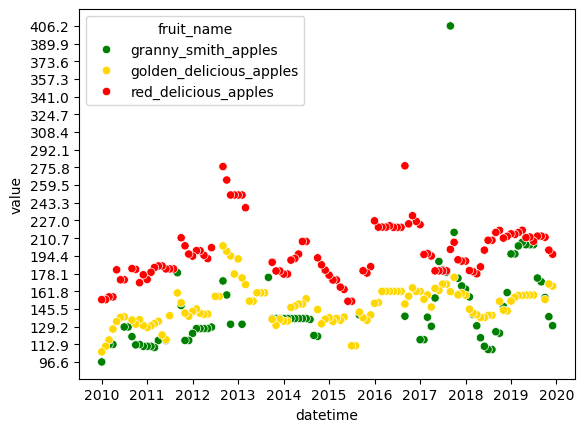

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a new column called "datetime" in datetime format
apple_data["datetime"] = pd.to_datetime(apple_data["year"] + "-" + apple_data["periodName"])

#plot the result
g = sns.scatterplot(
    data = apple_data,
    x = apple_data['datetime'],
    y= apple_data['value'],
    hue = 'fruit_name', #groups the series to plot by category
    palette =  {'granny_smith_apples':'green', # color the apples the intuitive color on plot
                'red_delicious_apples':'red', 
                'golden_delicious_apples':'gold'}
)

# make the y-ticks readable
plt.yticks(np.linspace(apple_data['value'].min(), apple_data['value'].max(), 20));


## Exercise
Try exploring the BLS API, for instance to compare types of melons. What range of data is available? You could try to explore other goods in the economy using the full table of group numbers and item numbers on [this page](https://download.bls.gov/pub/time.series/wp/wp.item). Or try to explore other data series like unemployment, productivity and workplace injuries using the seriesID recipes on [this page](https://www.bls.gov/help/hlpforma.htm). (5 Minutes)

_Hint: You can copy and modify the above code snippets if needed. Clicking to the left of a cell or pressing escape while in a code cell takes you to the command interface. You can use the letter `c` to copy and `v` to past cells in a notebook. Other common command interface hot keys are `x` to cut a cell/group of cells, `ii` to interrupt a cell, `a` to add a cell above and `b` to add a cell below._

In [ ]:
# your code goes here. 

### End of exercise

# Assignment

In this assignment we want to get comfortable with loading and manipulating data in Python. While future assignments will focus more using structured data which we can load into a `DataFrame` using `pandas`, this assignment is focused on semi-structured data and how we can "flatten" it and then load it into other formats. The objective is to see how data flows in Python from one object to another and what advantages and disadvantages each offers.

Let's read the `books.json` data set and display the first item in it.

In [4]:
import json
with open('../data/books.json', encoding = 'utf-8') as f:
    books_dict = json.load(f)

from pprint import pprint
pprint(books_dict[0]) # print information for the first book

{'_id': 1,
 'authors': ['W. Frank Ableson', 'Charlie Collins', 'Robi Sen'],
 'categories': ['Open Source', 'Mobile'],
 'isbn': '1933988673',
 'longDescription': 'Android is an open source mobile phone platform based on '
                    'the Linux operating system and developed by the Open '
                    'Handset Alliance, a consortium of over 30 hardware, '
                    'software and telecom companies that focus on open '
                    'standards for mobile devices. Led by search giant, '
                    'Google, Android is designed to deliver a better and more '
                    'open and cost effective mobile experience.    Unlocking '
                    "Android: A Developer's Guide provides concise, hands-on "
                    'instruction for the Android operating system and '
                    'development tools. This book teaches important '
                    'architectural concepts in a straightforward writing style '
                    

1. Write a program that goes through the entire data and extracts the following information:  <span style="color:red" float:right>[4 point]</span>

  - title of the book
  - name of the first author
  - name of the second author (if book has more than one author)
  - number of authors
  - ISBN
  - if the word "data" is in the book's description
  - the number of words in the book's description
  - the year the book was published

  Of course because JSON data doesn't necessarily enforce any sort of schema, we can't be sure that the information we are trying to extract exists for every book. For example, if the book only has one author, then there is no second author. So use `try` and `except` as you loop through every book and skip to the next item every time some information is missing.

  Store the extracted data in a list named `rows` whose elements are tuples, one tuple per book. For example, the first element of `rows` stores the tuple for the first book and should look like this:

        ('Unlocking Android', 'W. Frank Ableson', 'Charlie Collins', 3, '1933988673', True, 252, 2009)

2. Save the content of `rows` in a SQL-like table using `sqlite3`, and choose the appropriate column types. <span style="color:red" float:right>[2 point]</span> 

  As your column names use the following:

  - `title`
  - `author_1`
  - `author_2`
  - `num_authors`
  - `isbn`
  - `has_data`
  - `desc_len`
  - `year_published`

3. Write a SQL query against the table to show all books that (1) contain the word "data" and (2) have more than 3 authors. Store the result of the query in an object called `books_table`, then close the connection. <span style="color:red" float:right>[2 point]</span>

SQL tables are not the only way, and definitely not the most straightforward way to store and manipulate data in Python. A format that's more popular with data scientists is to use the `pandas` library to create a `DataFrame`. This library has a lot of functionality that makes it easy to run the common tasks data scientists do with data.

4. Read the data from the above query into a `DataFrame` and call it `books_df`. HINT: Use `pd.DataFrame` and specify the names to use for the columns. <span style="color:red" float:right>[1 point]</span>

In [ ]:
import pandas as pd

5. Display the first few columns of a `DataFrame` by calling its `head` method. <span style="color:red" float:right>[1 point]</span>

Remember how earlier we said that a `DataFrame` is built on top of `numpy` arrays? Another way of saying it is that a `DataFrame` is an **abstraction** on top of `numpy` arrays: i.e. a `DataFrame` is a more **high-level** object than a `numpy` array. 

6. Call the `values` attribute of your `DataFrame` to convert it into a numpy array and display the first 3 elements of the array. <span style="color:red" float:right>[1 point]</span>

Now you can judge which object is more "user-friendly". That's one of the things that abstractions allow us to do: build more user-friendly (abstract) objects from less user-friendly (but more fundamental) objects.

# End of assignment